In [43]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [26]:
path_data_train = "../dataset/raw_dataset/train.csv"
application_train = pd.read_csv(path_data_train)

path_data_test = "../dataset/raw_dataset/test.csv"
application_test = pd.read_csv(path_data_test)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(application_train.head())

   id  label               province               district  age_source1  \
0   0      0                    NaN                    NaN          NaN   
1   1      0          Tỉnh Đồng Nai     Thành phố Biên Hòa         44.0   
2   2      0          Tỉnh Đồng Nai       Huyện Long Thành         30.0   
3   3      0       Tỉnh Tuyên Quang  Thành phố Tuyên Quang         43.0   
4   4      0  Thành phố Hồ Chí Minh                 Quận 1         21.0   

   age_source2       maCv  FIELD_1  FIELD_2  FIELD_3   ...     FIELD_48  \
0          NaN        NaN        1      1.0   2547.0   ...         True   
1         44.0       None        1      0.0     -1.0   ...        False   
2         30.0  Công nhân        0      1.0   3273.0   ...         True   
3          NaN        NaN        0      1.0   3991.0   ...         True   
4         21.0       None        0      1.0   1450.0   ...         True   

   FIELD_49  FIELD_50 FIELD_51 FIELD_52 FIELD_53 FIELD_54 FIELD_55 FIELD_56  \
0      True       N

# Explodary data analysis

In [27]:
application_train['label'].value_counts()

0    29514
1      486
Name: label, dtype: int64

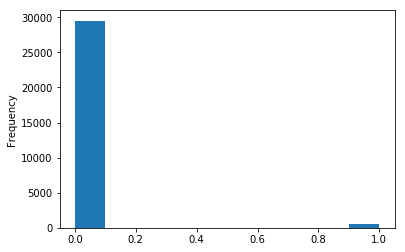

In [5]:
application_train['label'].astype(int).plot.hist()

class so imbalance with ratio as: 1.62 %.

# Examine missing values

Just null missing has count, type none, or nan, or na in column think has a meaning difference with null. Need check it later !!

In [6]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()        
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
df_missing = missing_values_table(application_train)
df_missing

Your selected dataframe has 64 columns.
There are 51 columns that have missing values.


,Missing Values,% of Total Values
district,12849,42.8
province,12818,42.7
age_source1,12811,42.7
FIELD_13,9700,32.3
maCv,9679,32.3
FIELD_30,9678,32.3
FIELD_31,9678,32.3
FIELD_35,9678,32.3
FIELD_36,9678,32.3
FIELD_37,9678,32.3


Check column types

In [8]:
application_train.dtypes.value_counts()

object     34
float64    18
int64       9
bool        3
dtype: int64

In [32]:
def plot_stats(feature, is_train=True, label_rotation=False,horizontal_layout=True):

    if is_train:
        path_data_train = "../dataset/raw_dataset/train.csv"
        application_train = pd.read_csv(path_data_train)
    else:
        path_data_test = "../dataset/raw_dataset/test.csv"
        application_train = pd.read_csv(path_data_test)
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})
    if is_train:
    # Calculate the percentage of target=1 per category value
        cat_perc = application_train[[feature, 'label']].groupby([feature],as_index=False).mean()
    
#     cat_perc = cat_perc.div(cat_perc[feature].sum(axis=1), axis=0).multiply(100)
    
        cat_perc.sort_values(by='label', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    if is_train:
        s = sns.barplot(ax=ax2, x = feature, y='label', order=cat_perc[feature], data=cat_perc)
        if(label_rotation):
            s.set_xticklabels(s.get_xticklabels(),rotation=90)
        plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
        plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

def plot_many_stats(l_features, is_train=True, label_rotaion=True, horizontal_layout=True):
    for feature in l_features:
         plot_stats(feature, is_train, label_rotaion, horizontal_layout)

In [33]:
# Plot distribution of one feature
def plot_distribution(feature, color, bins=100):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(application_train[feature].dropna(),color=color, kde=True,bins=bins)
    plt.show()   


def plot_many_distribution(dict_features_bin_color):
    nrow = len(dict_features_bin_color)
    plt.figure()
    fig, ax = plt.subplots(nrow, 1, figsize=(12, 6*nrow))
    
    i = 0
    for e_key, e_value in dict_features_bin_color.items():
        i += 1
        plt.subplot(nrow, 1, i)
        plt.title("Distribution of %s" % e_key)
        sns.distplot(application_train[e_key].dropna(),color=e_value['color'], kde=True,bins=e_value['bins'])
    plt.show()   
        
        

In [34]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = application_train.loc[application_train['label'] != 0]
    t1 = t1.dropna()
    t0 = application_train.loc[application_train['label'] == 0]
    t0 = t0.dropna()

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow, 1, figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow, 1, i)
        sns.kdeplot(t1[feature], bw=0.5,label="label = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="label = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3191: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


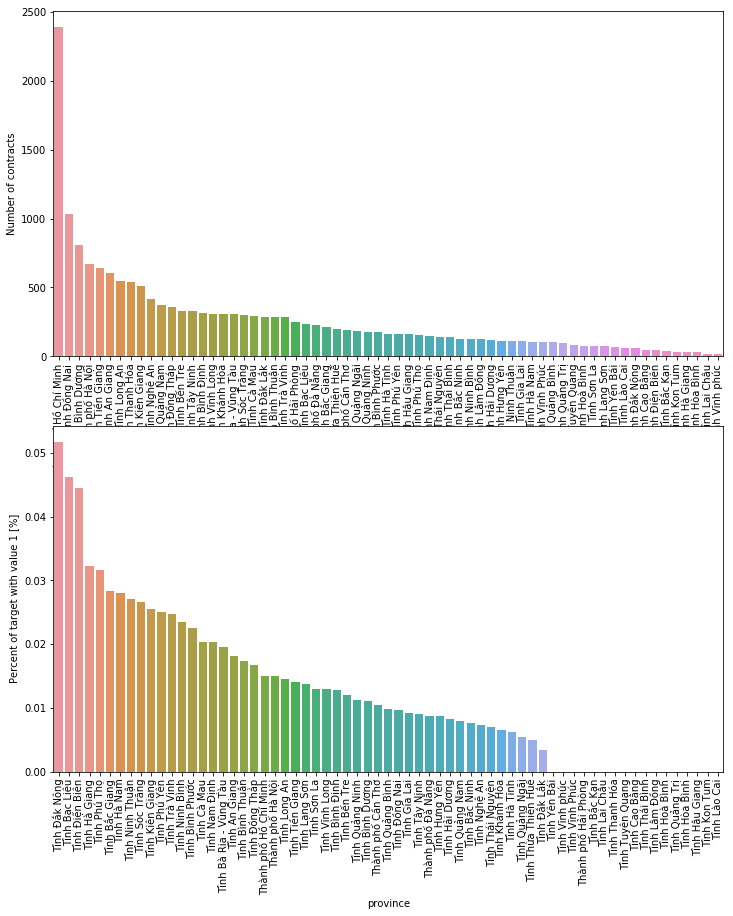

In [35]:
plot_stats('province', label_rotation=True, horizontal_layout=False)

In [36]:
print(application_train['province'].value_counts().keys())

Index(['Thành phố Hồ Chí Minh', 'Tỉnh Đồng Nai', 'Tỉnh Bình Dương',
       'Thành phố Hà Nội', 'Tỉnh Tiền Giang', 'Tỉnh An Giang', 'Tỉnh Long An',
       'Tỉnh Thanh Hóa', 'Tỉnh Kiên Giang', 'Tỉnh Nghệ An', 'Tỉnh Quảng Nam',
       'Tỉnh Đồng Tháp', 'Tỉnh Bến Tre', 'Tỉnh Tây Ninh', 'Tỉnh Bình Định',
       'Tỉnh Vĩnh Long', 'Tỉnh Khánh Hòa', 'Tỉnh Bà Rịa - Vũng Tàu',
       'Tỉnh Sóc Trăng', 'Tỉnh Cà Mau', 'Tỉnh Đắk Lắk', 'Tỉnh Bình Thuận',
       'Tỉnh Trà Vinh', 'Thành phố Hải Phòng', 'Tỉnh Bạc Liêu',
       'Thành phố Đà Nẵng', 'Tỉnh Bắc Giang', 'Tỉnh Thừa Thiên Huế',
       'Thành phố Cần Thơ', 'Tỉnh Quảng Ngãi', 'Tỉnh Quảng Ninh',
       'Tỉnh Bình Phước', 'Tỉnh Hà Tĩnh', 'Tỉnh Phú Yên', 'Tỉnh Hậu Giang',
       'Tỉnh Phú Thọ', 'Tỉnh Nam Định', 'Tỉnh Thái Nguyên', 'Tỉnh Thái Bình',
       'Tỉnh Bắc Ninh', 'Tỉnh Ninh Bình', 'Tỉnh Lâm Đồng', 'Tỉnh Hải Dương',
       'Tỉnh Hưng Yên', 'Tỉnh Ninh Thuận', 'Tỉnh Gia Lai', 'Tỉnh Hà Nam',
       'Tỉnh Vĩnh Phúc', 'Tỉnh Quảng Bình', 'Tỉnh Q

In [37]:
# print(application_train.loc(application_train['label'] == 1)['district'])

In [38]:
# plot_stats('maCv', label_rotation=True, horizontal_layout=False)

show maCV do not provide more infomation, because show many type of job, so we need some normalization to make info of job can be more useful,
example: get n-gram best freq of job:
- 'công nhân chuyền 2' => 'công nhân'
- 'công nhân kiểm tra' =>  'công nhân'


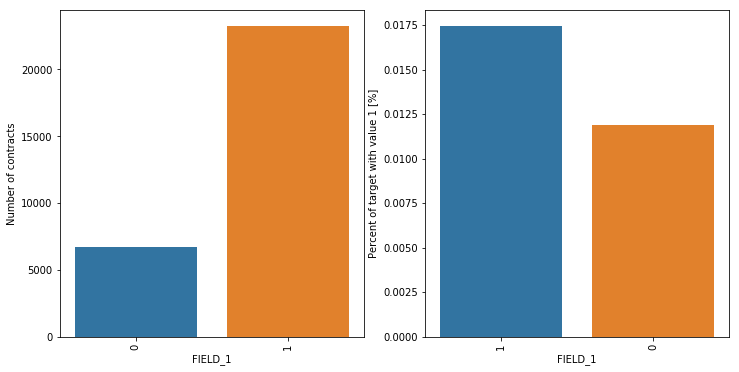

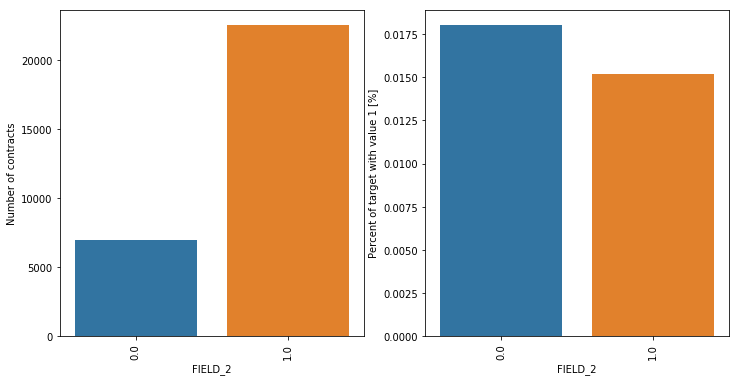

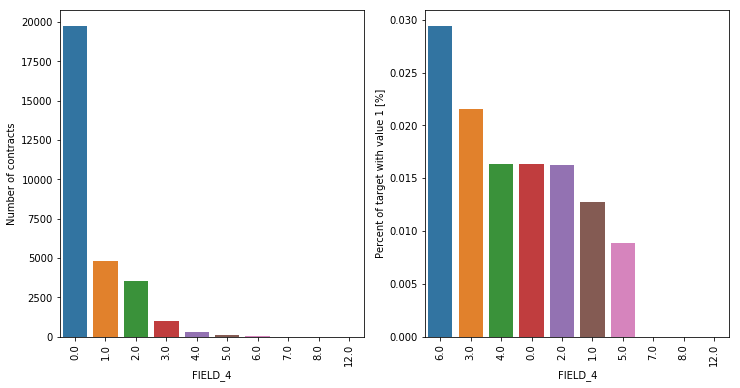

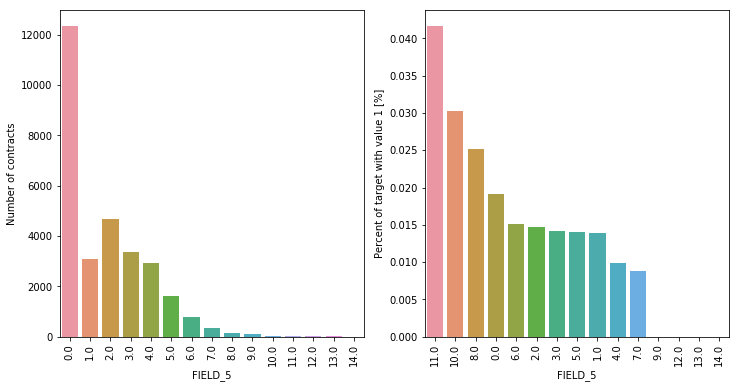

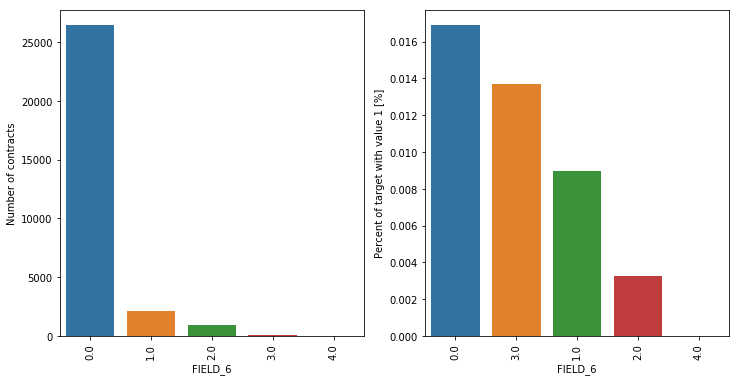

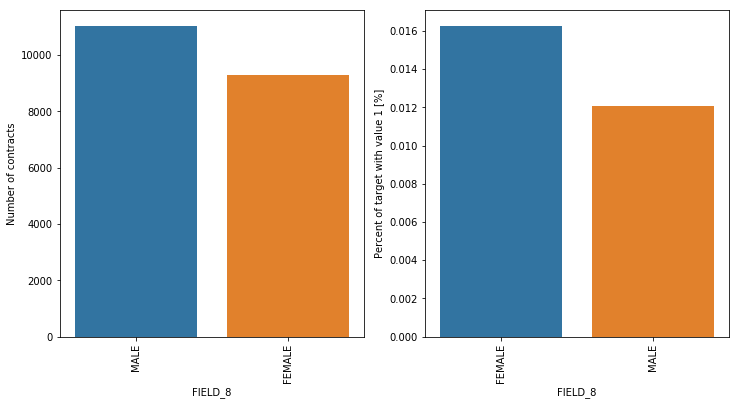

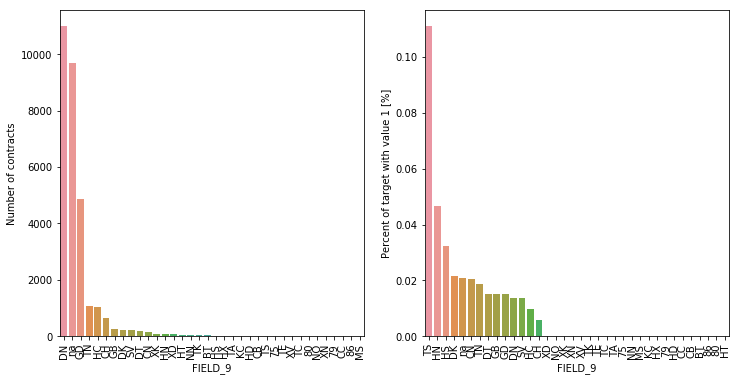

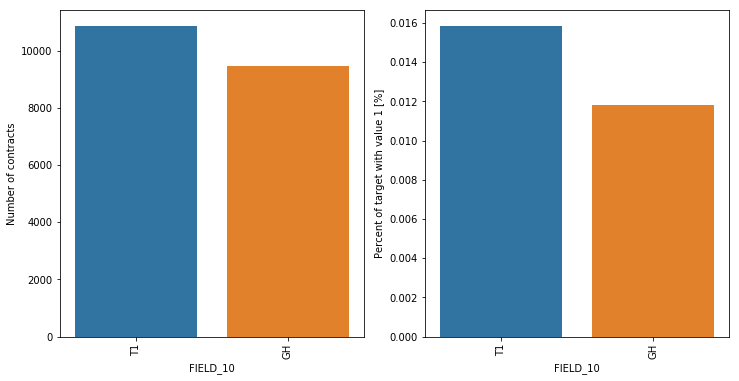

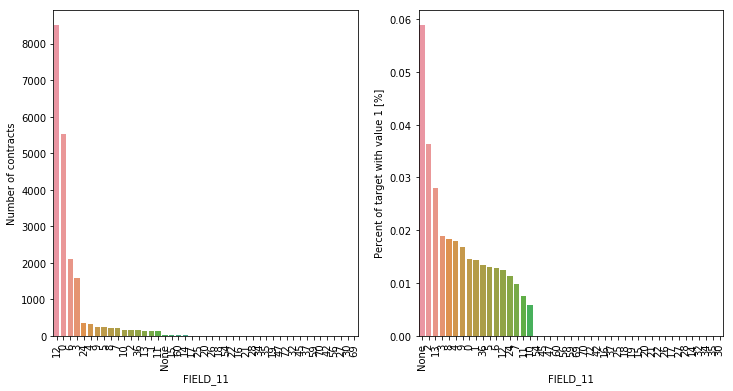

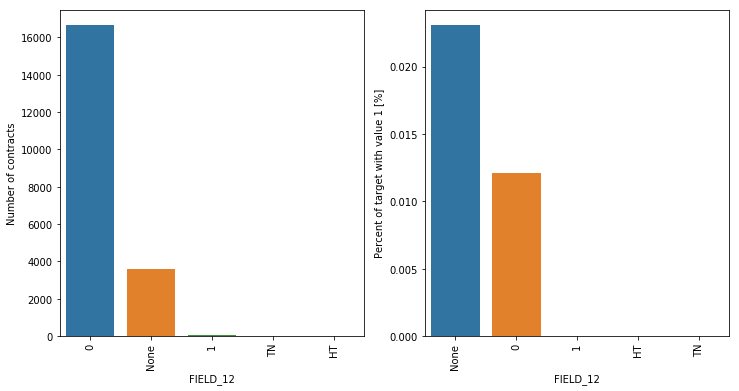

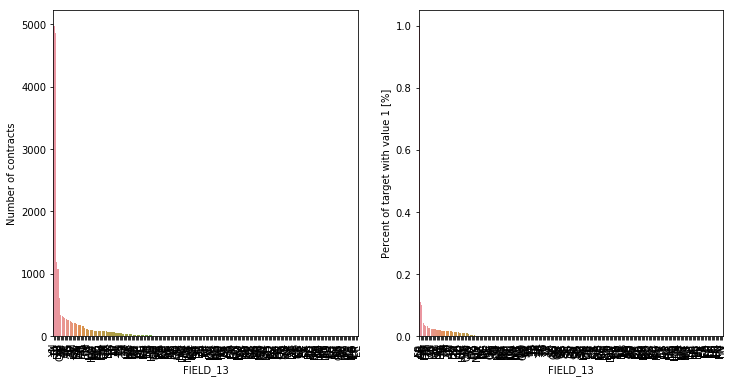

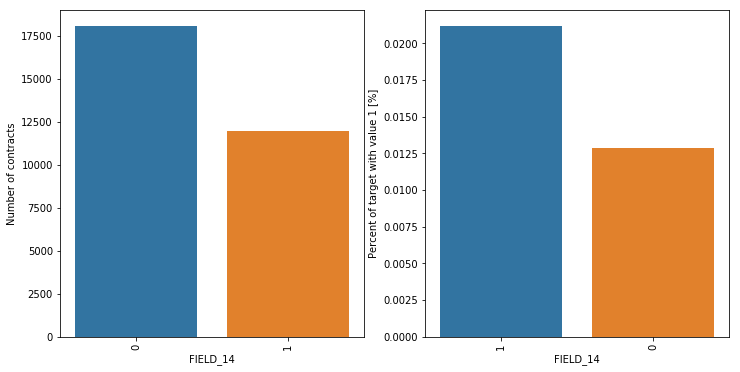

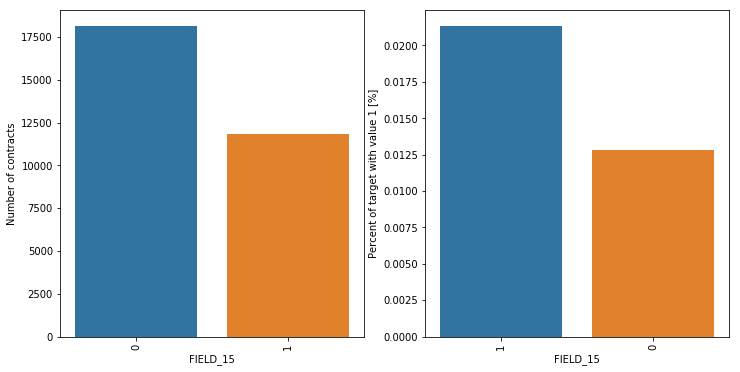

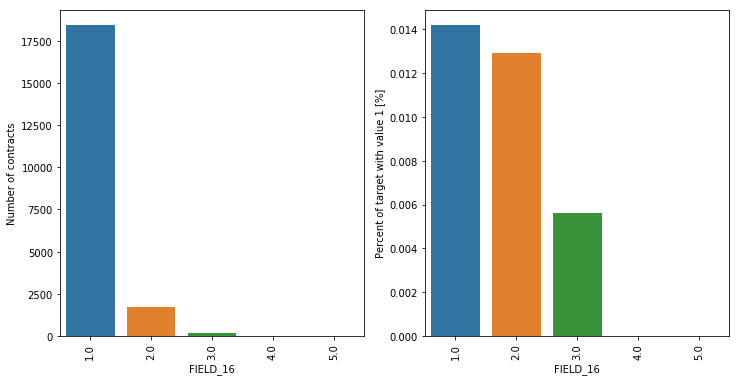

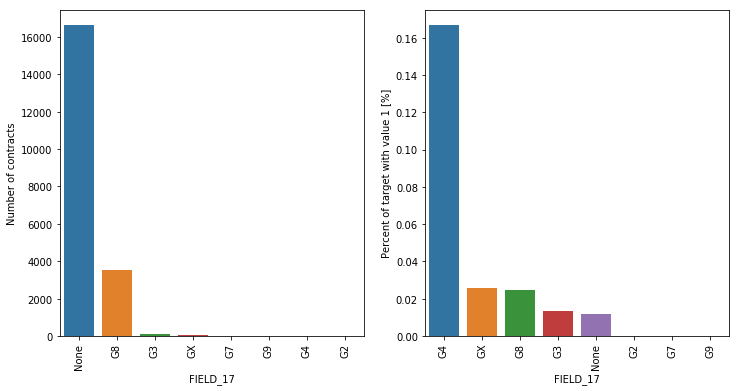

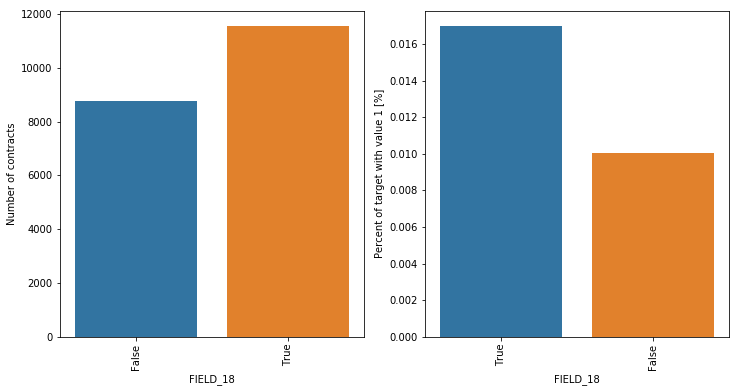

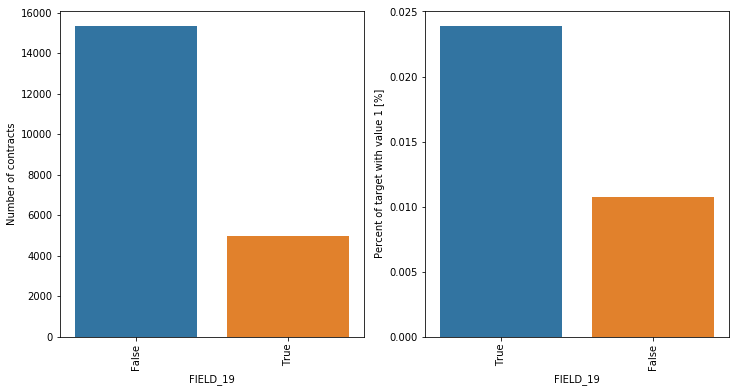

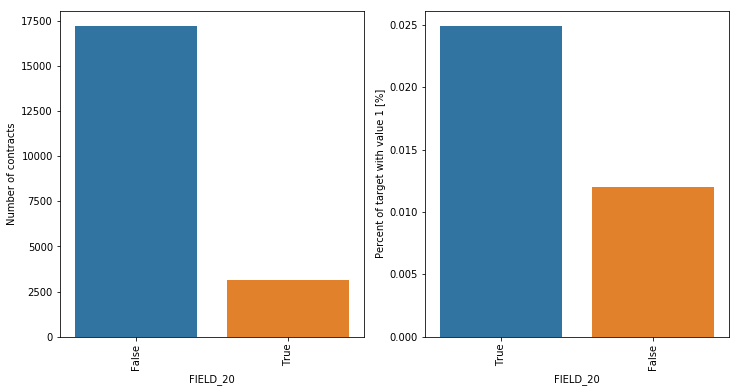

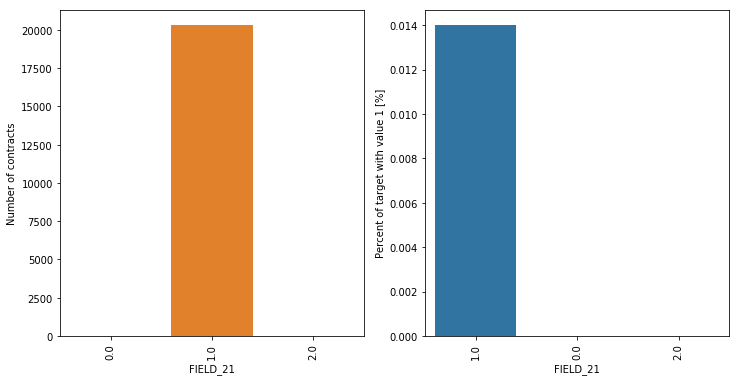

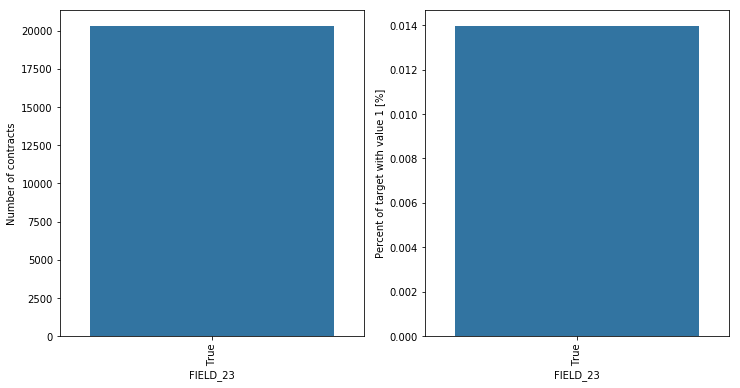

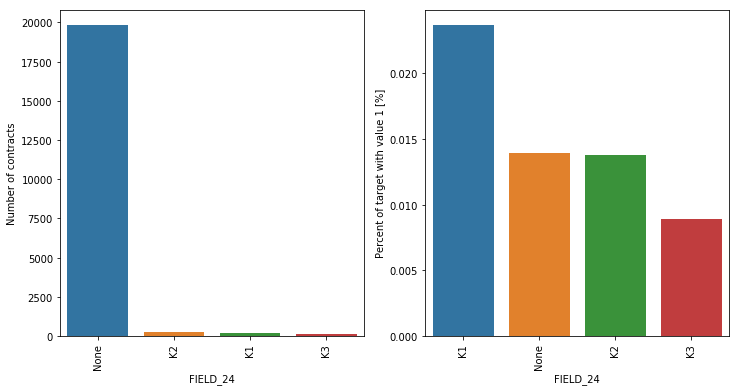

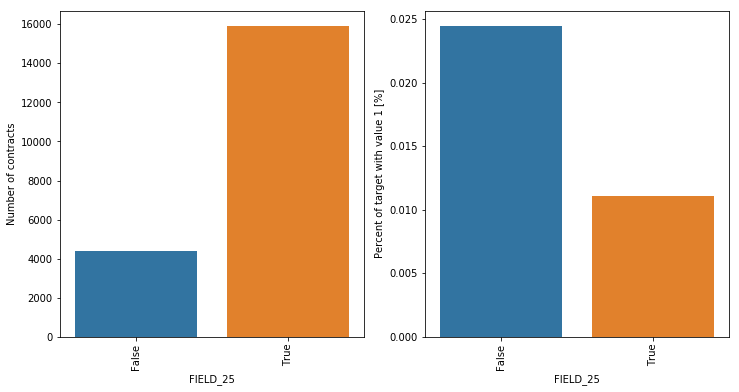

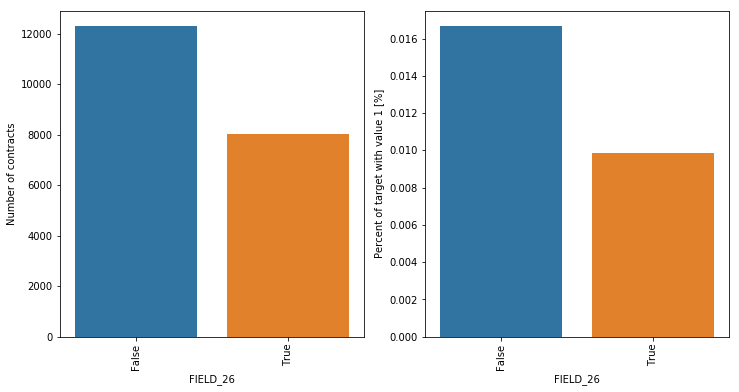

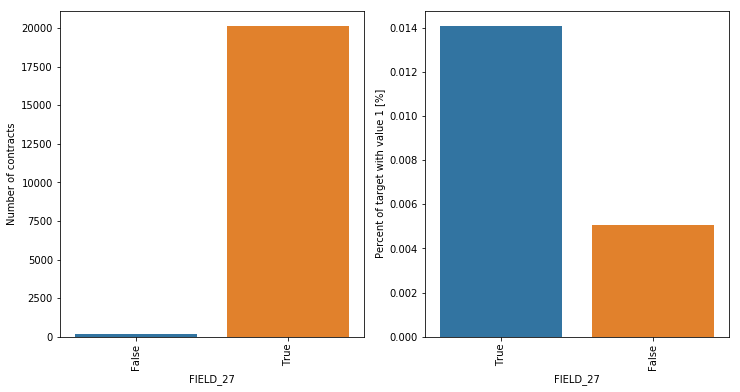

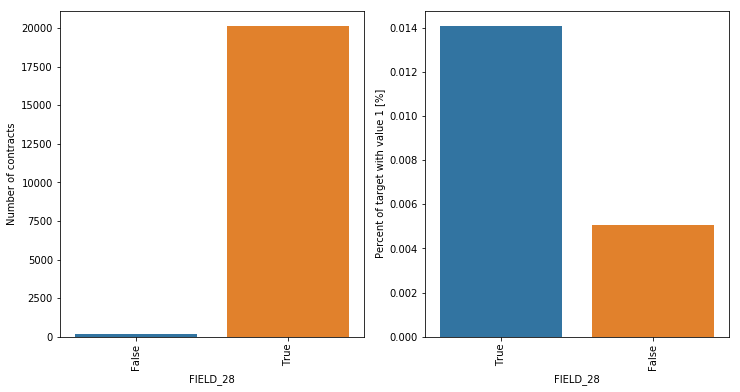

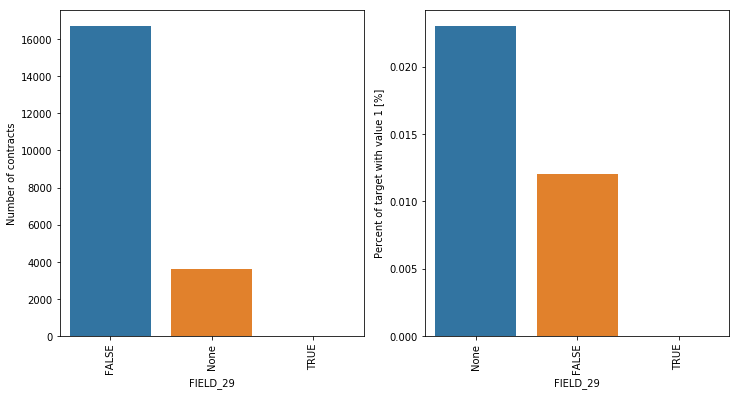

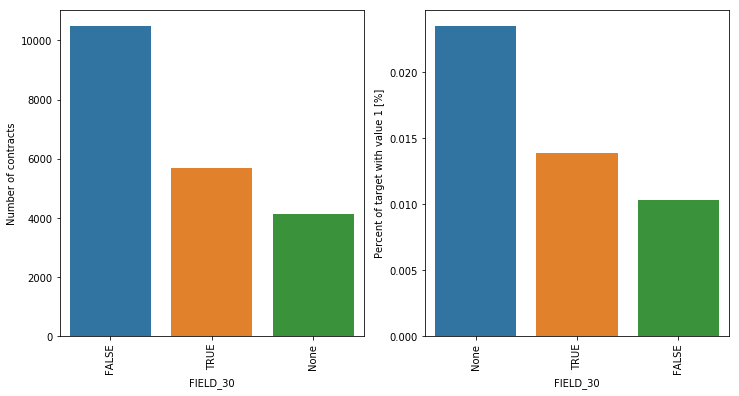

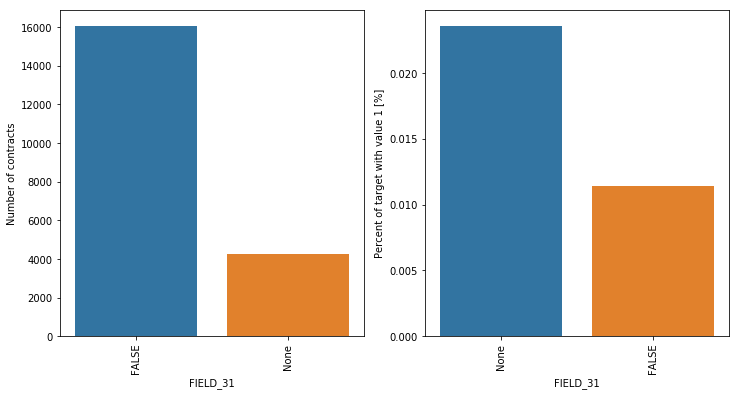

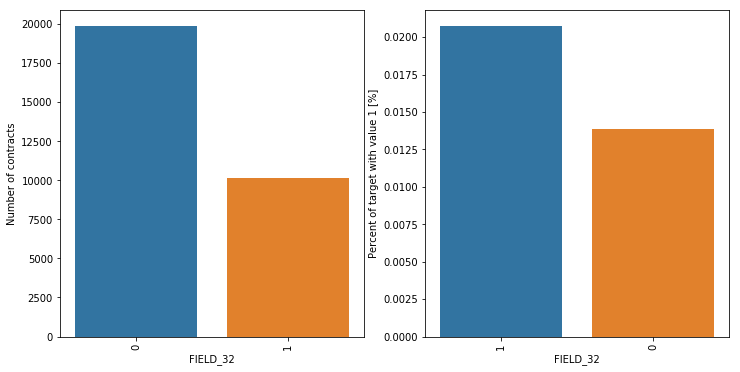

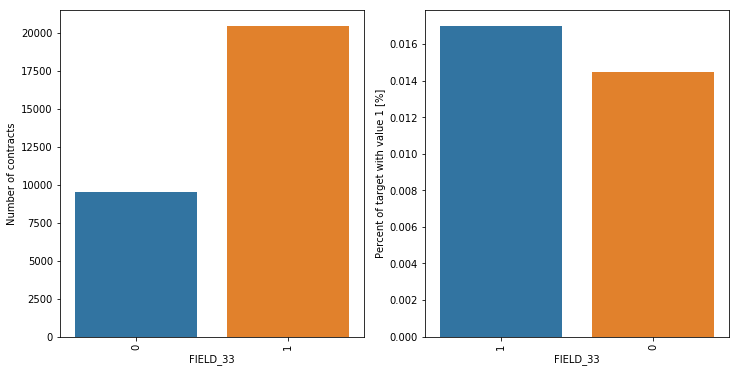

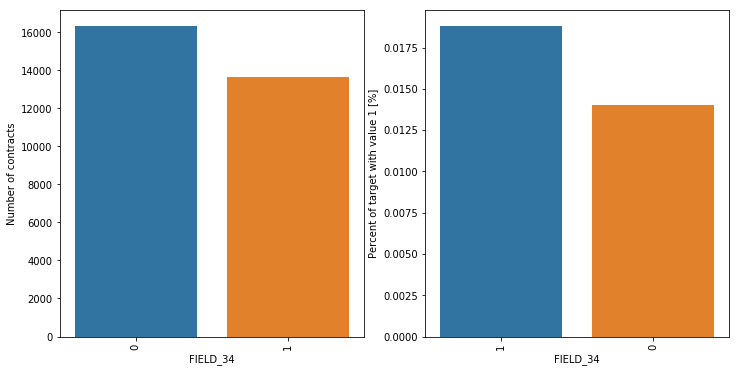

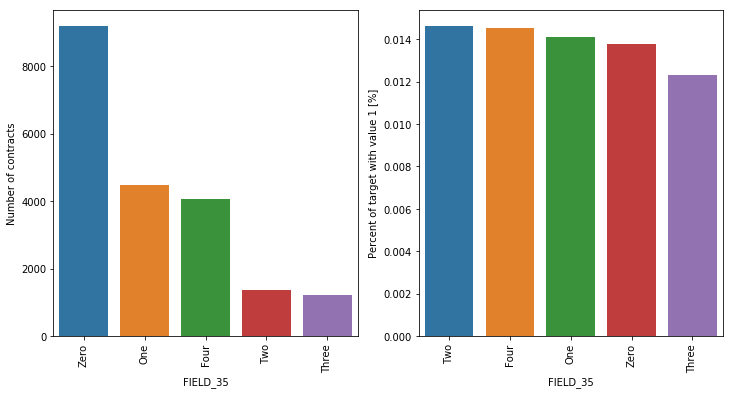

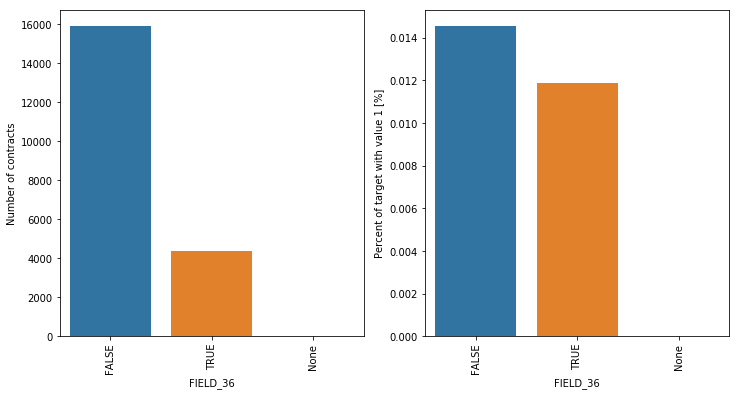

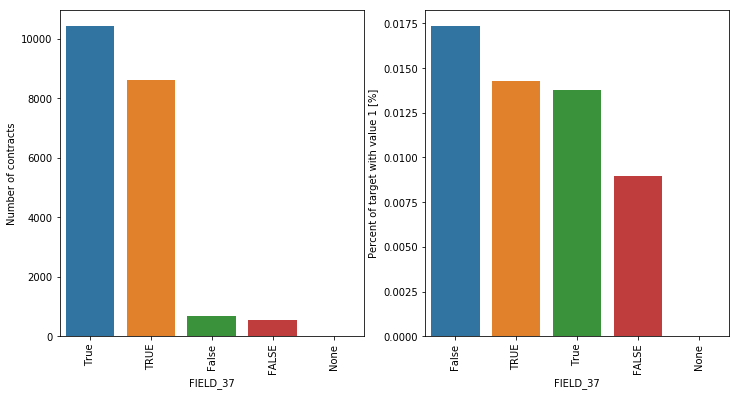

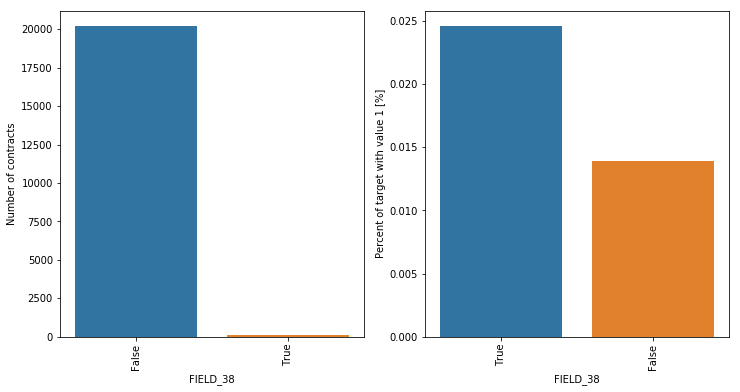

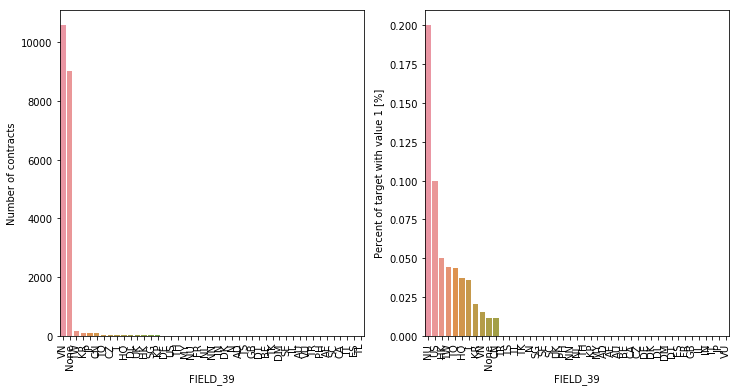

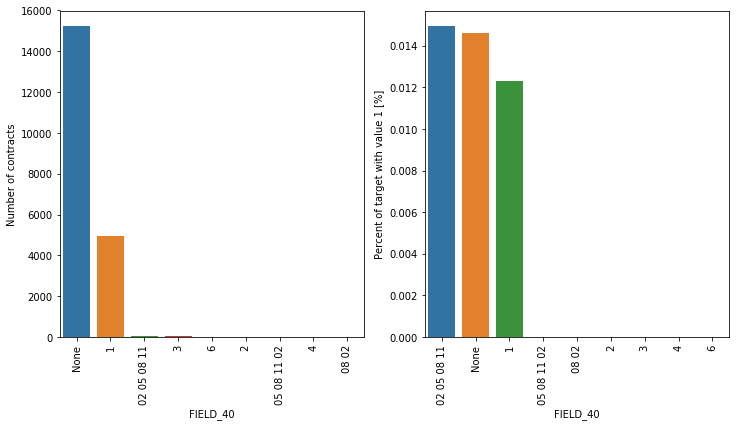

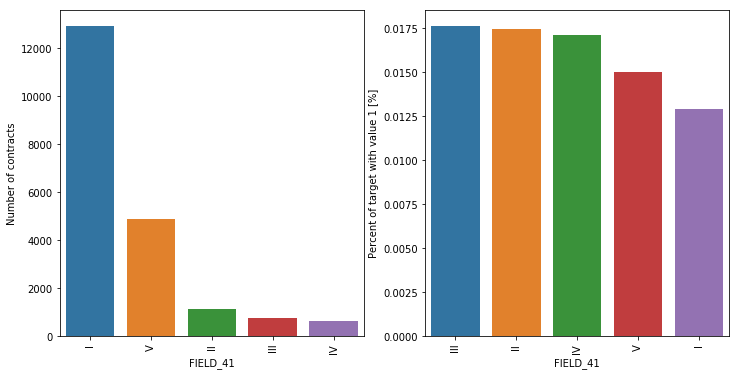

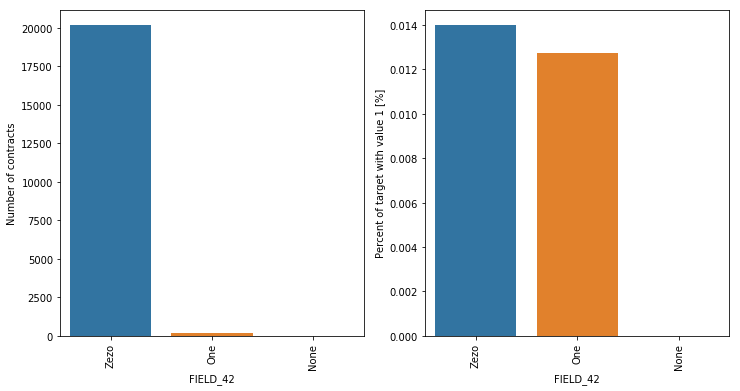

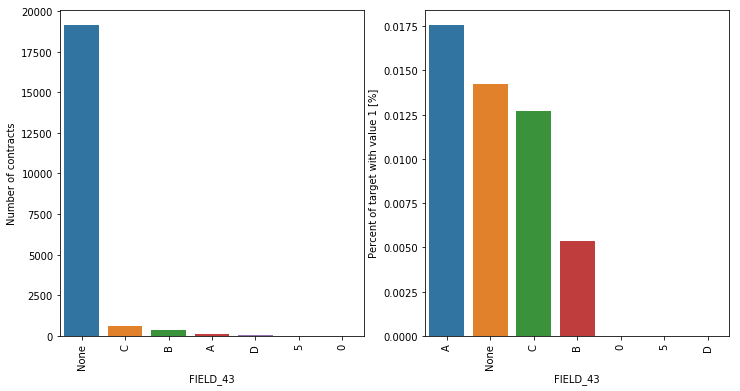

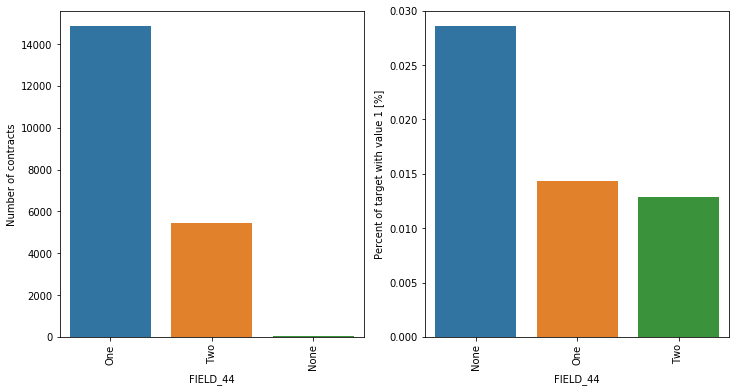

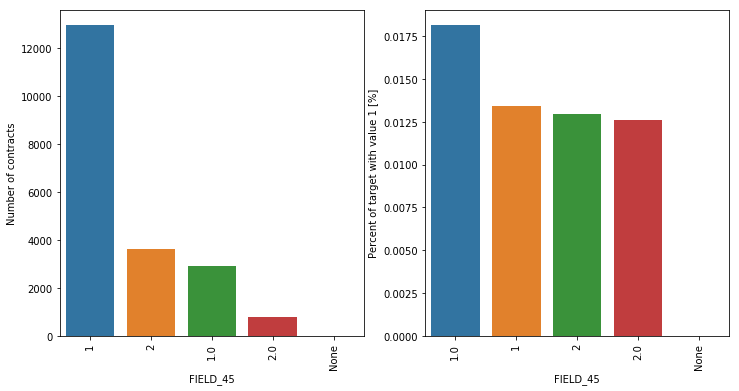

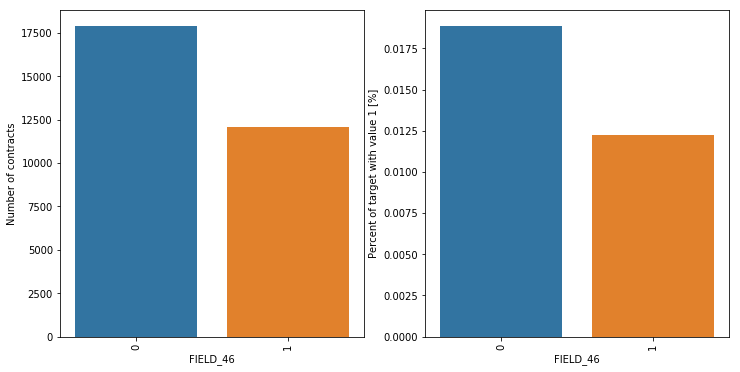

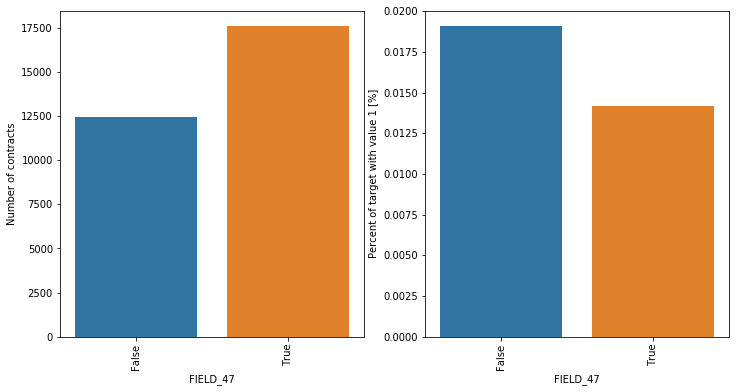

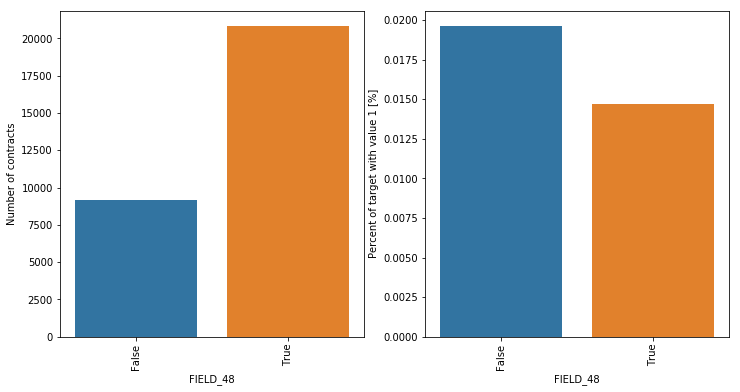

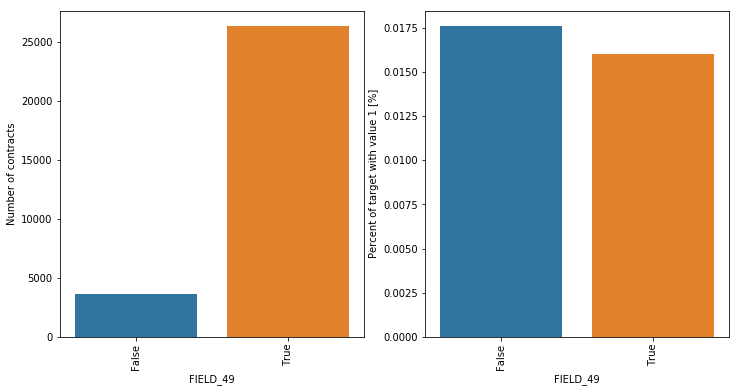

In [41]:
l_featuers_stats = ['FIELD_1', 'FIELD_2', "FIELD_4", "FIELD_5", "FIELD_6", "FIELD_8", "FIELD_9", "FIELD_10",
                   "FIELD_11", "FIELD_12", "FIELD_13", "FIELD_14", "FIELD_15", "FIELD_16", "FIELD_17", "FIELD_18",
                   "FIELD_19", "FIELD_20", "FIELD_21", "FIELD_23", "FIELD_24", "FIELD_25", "FIELD_26", "FIELD_27",
                   "FIELD_28", "FIELD_29", "FIELD_30", "FIELD_31", "FIELD_32", "FIELD_33", "FIELD_34", "FIELD_35",
                   "FIELD_36", "FIELD_37", "FIELD_38", "FIELD_39", "FIELD_40", "FIELD_41", "FIELD_42", "FIELD_43",
                   "FIELD_44", "FIELD_45", "FIELD_46", "FIELD_47", "FIELD_48", "FIELD_49"]
plot_many_stats(l_featuers_stats, is_train=True)

dict_keys(['age_source1', 'age_source2', 'FIELD_3', 'FIELD_22', 'FIELD_50', 'FIELD_51', 'FIELD_52', 'FIELD_53', 'FIELD_54', 'FIELD_55', 'FIELD_56', 'FIELD_57'])


<Figure size 432x288 with 0 Axes>

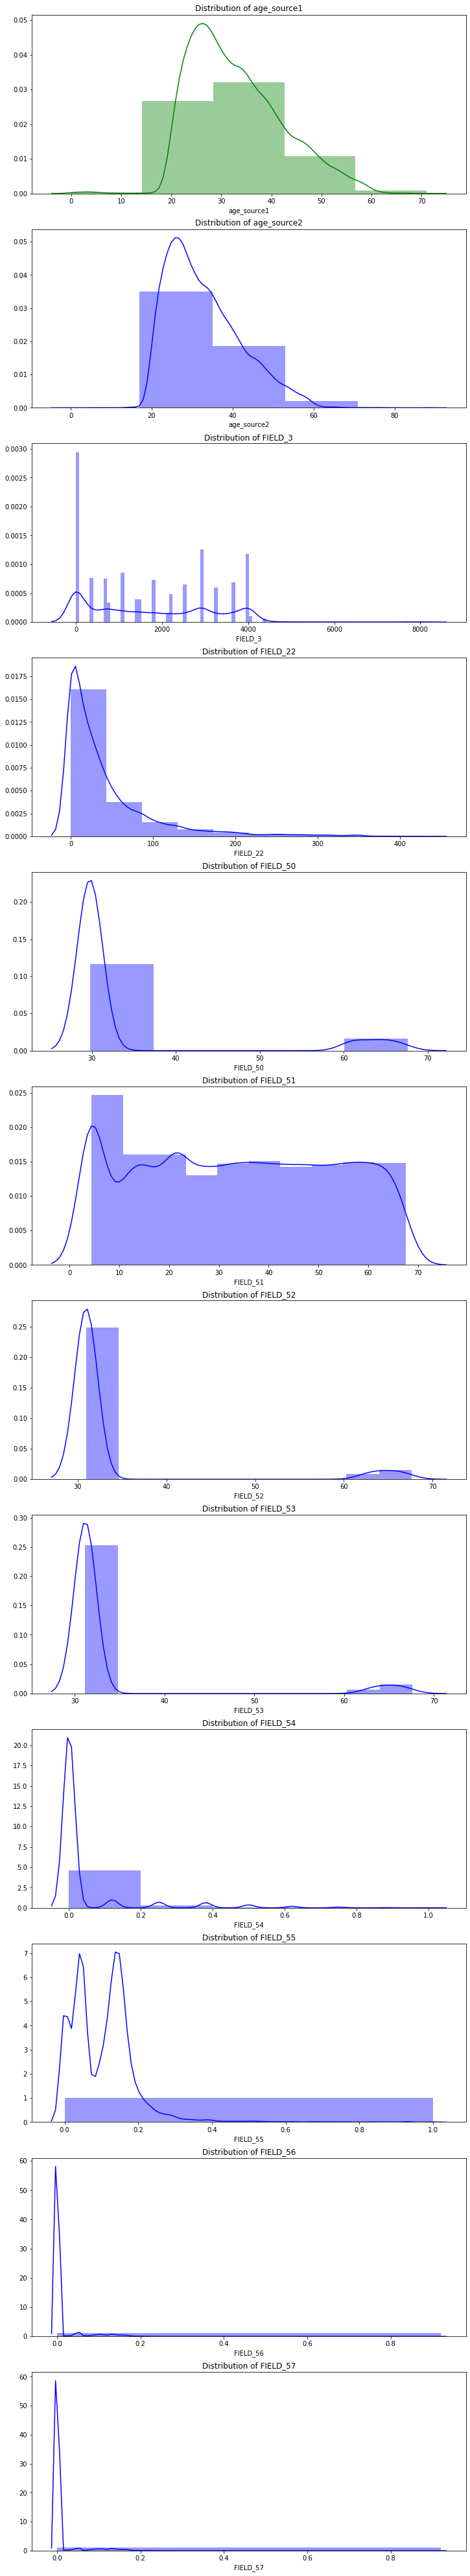

In [18]:
dict_field_discrete = {
    "age_source1": {
        "color": "green",
        "bins": 5
    },
    "age_source2": {
        "color": "blue",
        "bins": 5
    },
    "FIELD_3": {
        "color": "blue",
        "bins": 100
    },
    "FIELD_22": {
        "color": "blue",
        "bins": 10
    },
    "FIELD_50": {
        "color": "blue",
        "bins": 5
    },    
    "FIELD_51": {
        "color": "blue",
        "bins": 10
    },
    "FIELD_52": {
        "color": "blue",
        "bins": 10
    },
    "FIELD_53": {
        "color": "blue",
        "bins": 10
    },
    "FIELD_54": {
        "color": "blue",
        "bins":5
    },
    "FIELD_55": {
        "color": "blue",
        "bins": 1
    },
    "FIELD_56": {
        "color": "blue",
        "bins": 1
    },
    "FIELD_57": {
        "color": "blue",
        "bins": 1
    }
}
print(dict_field_discrete.keys())
plot_many_distribution(dict_field_discrete)

<Figure size 432x288 with 0 Axes>

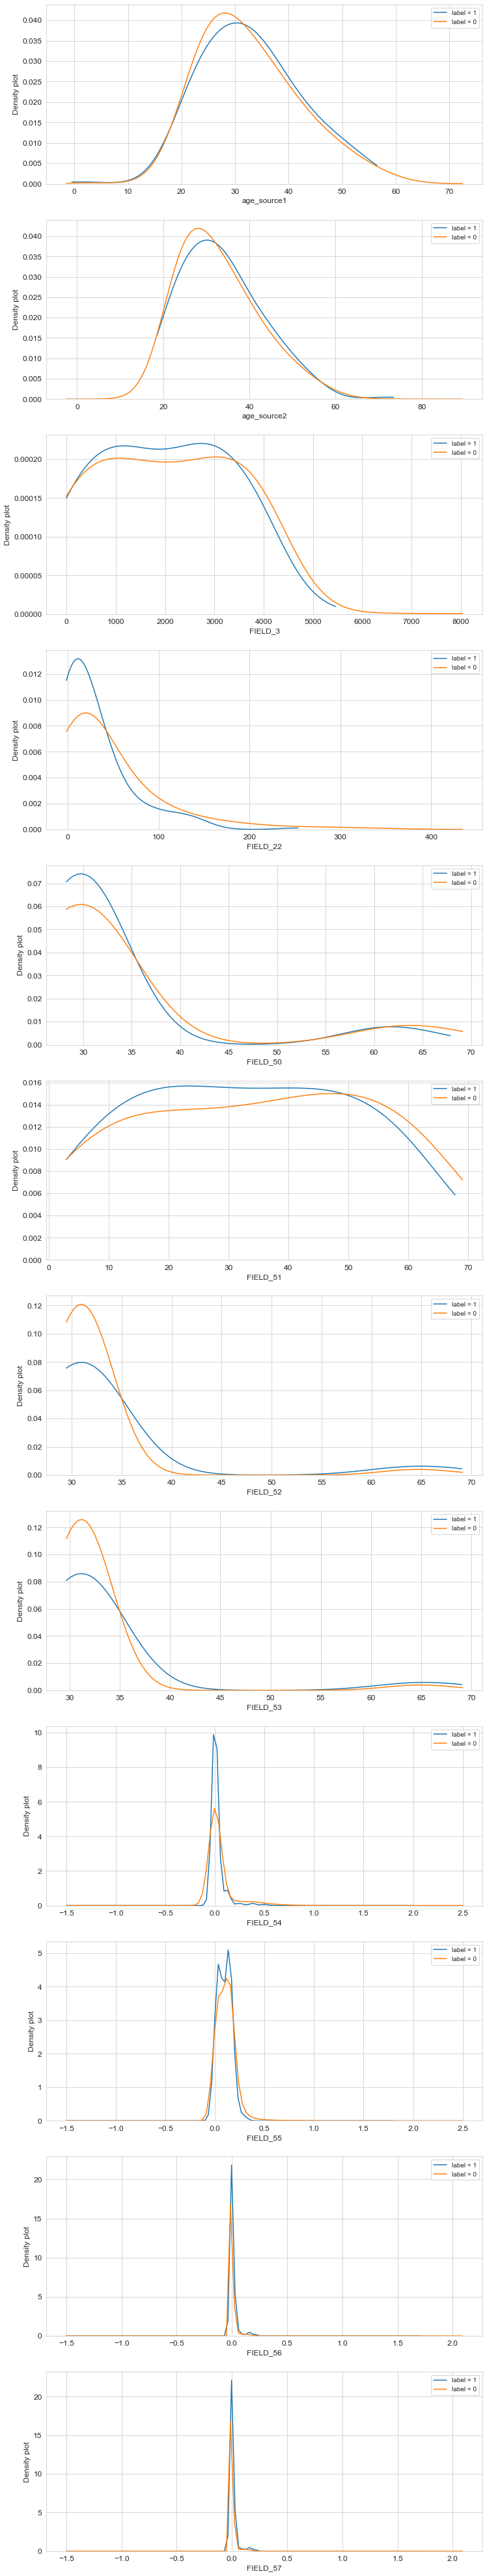

In [19]:
var = ['age_source1', 'age_source2', 'FIELD_3', 'FIELD_22', 'FIELD_50', 'FIELD_51', 'FIELD_52', 'FIELD_53', 'FIELD_54', 'FIELD_55', 'FIELD_56', 'FIELD_57']
plot_distribution_comp(var, nrow=int(len(var)))

Text(0.5, 1, 'Correlation Heatmap')

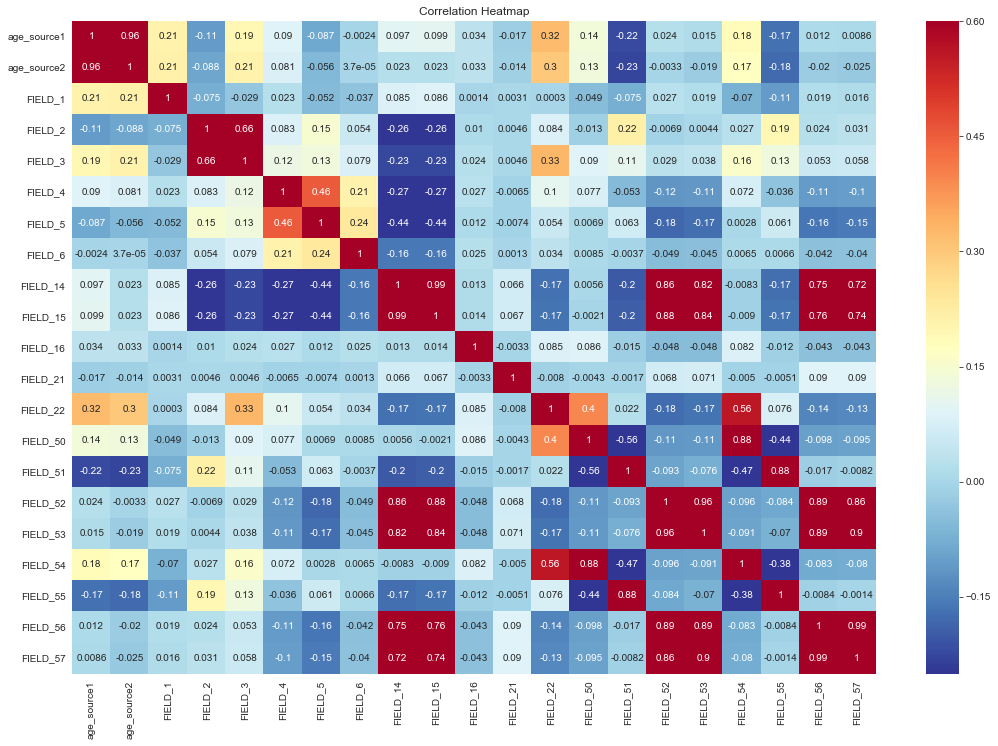

In [26]:
application_train_tmp = application_train[['age_source1', 'age_source2', 'FIELD_1', 'FIELD_2', 'FIELD_3', 'FIELD_4', 'FIELD_5', 'FIELD_6', 'FIELD_11', 'FIELD_12', 'FIELD_14',
                                           'FIELD_15', 'FIELD_16', 'FIELD_21', 'FIELD_22', 'FIELD_50', 'FIELD_51', 'FIELD_52', 'FIELD_53', 'FIELD_54', 'FIELD_55', 'FIELD_56', 'FIELD_57']]
app_corr = application_train_tmp.corr()
plt.figure(figsize = (18, 12))

# Heatmap of correlations
sns.heatmap(app_corr, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

In [50]:
# eda field 7 impact
l_labels = application_train['label'].tolist()

full_list_action_field_7 = []
list_action_field_7_label_1 = []
l_field_7 = application_train['FIELD_7'].tolist()
for idx, e_field_7 in enumerate(l_field_7):
    
    label_value = l_labels[idx]    
    e_field_7 = str(e_field_7)
    # print(e_field_7)
    e_field_7 = e_field_7.replace("[", "").replace("]", "").replace(", ", ",").replace("'", "")

    l_e_field_7 = e_field_7.split(",")
    if label_value == 1:        
        list_action_field_7_label_1.extend(l_e_field_7)
        
    full_list_action_field_7.extend(l_e_field_7)
count_freq_action_full = Counter(full_list_action_field_7)

count_freq_action_1 = Counter(list_action_field_7_label_1)

print(count_freq_action_full.keys())
print("\n")
print(count_freq_action_1)

dict_keys(['', 'GD', 'TE', 'DN', 'HN', 'CH', 'TQ', 'SV', 'HS', 'GB', 'nan', 'HT', 'TN', 'DK', 'XD', 'XK', 'BT', 'CN', 'DT', 'HC', 'KC', 'TA', 'CB', 'TK', 'TC', 'CC', 'TS', 'CK', 'NN', 'HD', 'MS', 'XV', 'HX', 'NO', 'PV', 'LS', 'XN', 'TB', 'QN'])


Counter({'': 242, 'GD': 203, 'DN': 203, 'TE': 116, 'HS': 109, 'DK': 37, 'DT': 21, 'CN': 20, 'nan': 17, 'HN': 16, 'HC': 14, 'TN': 11, 'HT': 11, 'GB': 9, 'BT': 7, 'CH': 7, 'SV': 6, 'CB': 4, 'XD': 3, 'TS': 3, 'KC': 3, 'XK': 2, 'CK': 2, 'TA': 2})


In [54]:
application_train['maCv'].fillna('None', inplace=True)
application_train['maCv'].head()

0         None
1         None
2    Công nhân
3         None
4         None
Name: maCv, dtype: object

In [80]:
# handle maCv
from nltk.util import ngrams
from collections import Counter
import operator

#
# list_cv = application_train['maCv'].tolist()
# print(len(list_cv))
list_cv = application_train.loc[application_train['label'] == 1].maCv.tolist()
print(len(list_cv))
# list_cv = list(set(list_cv))
# norm lower and replace text:
n_list_cv = []
all_list_2_gram_2 = []
count = 0
for e_cv in list_cv:
    count += 1
    if e_cv != "None":
        e_cv = e_cv.lower()
        e_cv = e_cv.replace("cn", "công nhân ")
        e_cv = e_cv.replace("nv", "nhân viên ")
        l_token_e_cv = e_cv.split(' ')
        output = list(ngrams(l_token_e_cv, 2))
        all_list_2_gram_2.extend(output)        
print(count)

counter_2_grams = Counter(all_list_2_gram_2)
l_ngrams_sorted_40 = sorted(counter_2_grams.items(), key=operator.itemgetter(1))[-25:]
print(l_ngrams_sorted_40)


486
486
[(('điện', 'tử'), 2), (('viên', ''), 2), (('nhân', 'lắp'), 2), (('lắp', 'ráp'), 2), (('viên', 'bán'), 2), (('bán', 'hàng'), 2), (('kỹ', 'thuật'), 2), (('viên', 'bảo'), 2), (('bảo', 'vệ'), 2), (('lái', 'xe'), 2), (('kiểm', 'tra'), 2), (('thành', 'hình'), 2), (('vận', 'hành'), 2), (('kinh', 'doanh'), 2), (('may', 'công'), 3), (('xuất', 'linh'), 3), (('linh', 'kiện'), 3), (('giáo', 'viên'), 4), (('nhân', 'may'), 4), (('công', 'nghiệp'), 4), (('nhân', 'sản'), 5), (('nhân', ''), 6), (('sản', 'xuất'), 7), (('nhân', 'viên'), 19), (('công', 'nhân'), 59)]


 label full statistic
[(('viên', 'bảo'), 62), (('cán', 'bộ'), 66), (('lắp', 'ráp'), 77), (('kinh', 'doanh'), 87), (('bảo', 'vệ'), 88), (('kế', 'toán'), 96), (('viên', '-'), 100), (('viên', 'bán'), 102), (('lái', 'xe'), 108), (('viên', ''), 122), (('bán', 'hàng'), 133), (('máy', 'may'), 137), (('hành', 'máy'), 155), (('nhân', 'vận'), 166), (('kỹ', 'thuật'), 184), (('vận', 'hành'), 213), (('nhân', 'sản'), 224), (('công', 'nghiệp'), 258), (('nhân', ''), 275), (('may', 'công'), 278), (('sản', 'xuất'), 345), (('nhân', 'may'), 357), (('giáo', 'viên'), 382), (('nhân', 'viên'), 1677), (('công', 'nhân'), 3747)]

[(('điện', 'tử'), 2), (('viên', ''), 2), (('nhân', 'lắp'), 2), (('lắp', 'ráp'), 2), (('viên', 'bán'), 2), (('bán', 'hàng'), 2), (('kỹ', 'thuật'), 2), (('viên', 'bảo'), 2), (('bảo', 'vệ'), 2), (('lái', 'xe'), 2), (('kiểm', 'tra'), 2), (('thành', 'hình'), 2), (('vận', 'hành'), 2), (('kinh', 'doanh'), 2), (('may', 'công'), 3), (('xuất', 'linh'), 3), (('linh', 'kiện'), 3), (('giáo', 'viên'), 4), (('nhân', 'may'), 4), (('công', 'nghiệp'), 4), (('nhân', 'sản'), 5), (('nhân', ''), 6), (('sản', 'xuất'), 7), (('nhân', 'viên'), 19), (('công', 'nhân'), 59)]

In [84]:
# so we list best freq cv 
l_best_freq = ["điện tử", "lắp ráp", "nhân viên", "bán hàng", "kỹ thuật", "bảo vệ", "lái xe", "kiểm tra", 
               "vận hành", "kinh doanh", "linh kiện",  "máy may", "giáo viên", "công nghiệp", 'sản xuất",
              "công nhân", "thành hình", "kế toán", "cán bộ", "nhân viên"]

SyntaxError: EOL while scanning string literal (<ipython-input-84-d1d339adc100>, line 3)